<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


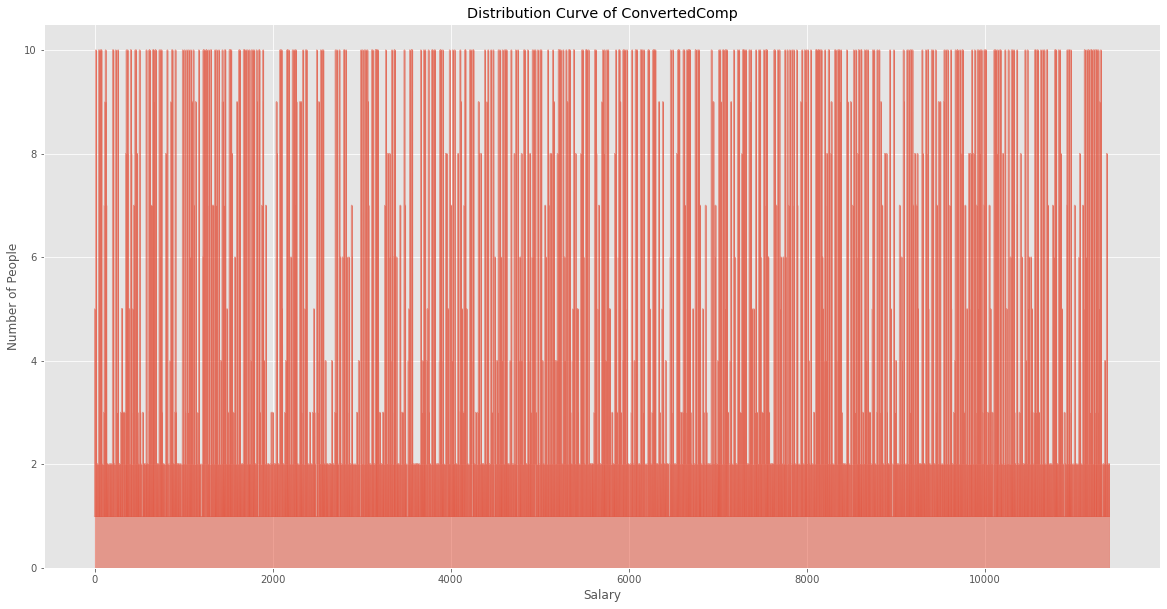

In [3]:
# your code goes here

#Import the necessities.
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#Set style of plot.
mpl.style.use(['ggplot'])

#Replace missing values in ConvertedComp with the mean of the column.
df['ConvertedComp'].replace(np.nan, df.ConvertedComp.mean(), inplace = True)

#Reset index.
df.reset_index(drop=True, inplace=True)

#Initialize list of salaries and index.
comp_list = []
index = 0

#Looping through data frame...
for ConvertedComp in df.iterrows():
    
    #If salary falls into given range, assign respective group number to the list.
    if df['ConvertedComp'][index] >= 0 and df['ConvertedComp'][index] < 100000:
        comp_list.append(1)
        
    if df['ConvertedComp'][index] >= 100000 and df['ConvertedComp'][index] < 200000:
        comp_list.append(2)
        
    if df['ConvertedComp'][index] >= 200000 and df['ConvertedComp'][index] < 300000:
        comp_list.append(3)

    if df['ConvertedComp'][index] >= 300000 and df['ConvertedComp'][index] < 400000:
        comp_list.append(4)
        
    if df['ConvertedComp'][index] >= 400000 and df['ConvertedComp'][index] < 500000:
        comp_list.append(5)
        
    if df['ConvertedComp'][index] >= 500000 and df['ConvertedComp'][index] < 600000:
        comp_list.append(6)
        
    if df['ConvertedComp'][index] >= 600000 and df['ConvertedComp'][index] < 700000:
        comp_list.append(7)
        
    if df['ConvertedComp'][index] >= 700000 and df['ConvertedComp'][index] < 800000:
        comp_list.append(8)
    
    if df['ConvertedComp'][index] >= 800000 and df['ConvertedComp'][index] < 900000:
        comp_list.append(9)
        
    if df['ConvertedComp'][index] >= 900000:
        comp_list.append(10)
    
    #Increment index by one.
    index = index + 1

#Load list into new column to categorize each person in a salary group (1 being the lowest, 10 being the highest).
df['GroupedConvertedComp'] = comp_list

#Plot the graph using the grouped values.
df.GroupedConvertedComp.plot(kind='area', stacked=False, figsize=(20, 10))

plt.title('Distribution Curve of ConvertedComp')
plt.ylabel('Number of People')
plt.xlabel('Salary')

plt.show()

Plot the histogram for the column `ConvertedComp`.


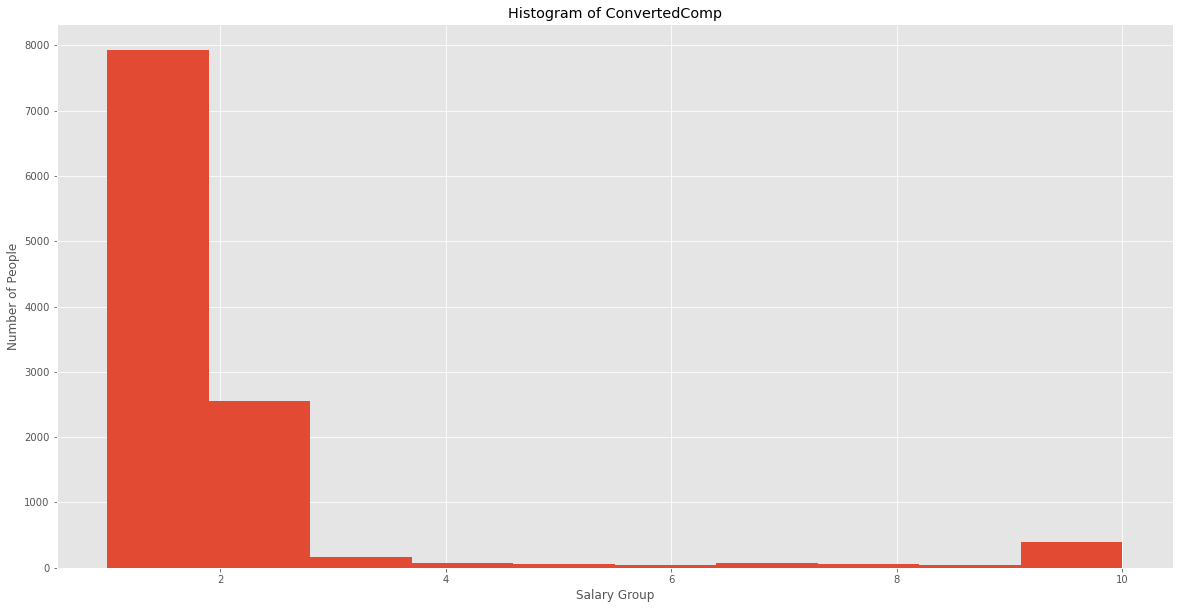

In [5]:
# your code goes here

df.GroupedConvertedComp.plot(kind='hist', stacked=False, figsize=(20, 10))

plt.title('Histogram of ConvertedComp')
plt.ylabel('Number of People')
plt.xlabel('Salary Group')

plt.show()

What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here

df.ConvertedComp.describe()

count    1.139800e+04
mean     1.315967e+05
std      2.840375e+05
min      0.000000e+00
25%      2.901600e+04
50%      6.301600e+04
75%      1.154640e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here

df['Gender'].value_counts()['Man']

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here

df.groupby(['Gender'])['ConvertedComp'].median()

Gender
Man                                                            63016.0
Man;Non-binary, genderqueer, or gender non-conforming          59520.0
Non-binary, genderqueer, or gender non-conforming              68745.0
Woman                                                          61071.0
Woman;Man                                                      25887.0
Woman;Man;Non-binary, genderqueer, or gender non-conforming    30244.0
Woman;Non-binary, genderqueer, or gender non-conforming        65535.5
Name: ConvertedComp, dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# your code goes here

df.Age.describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


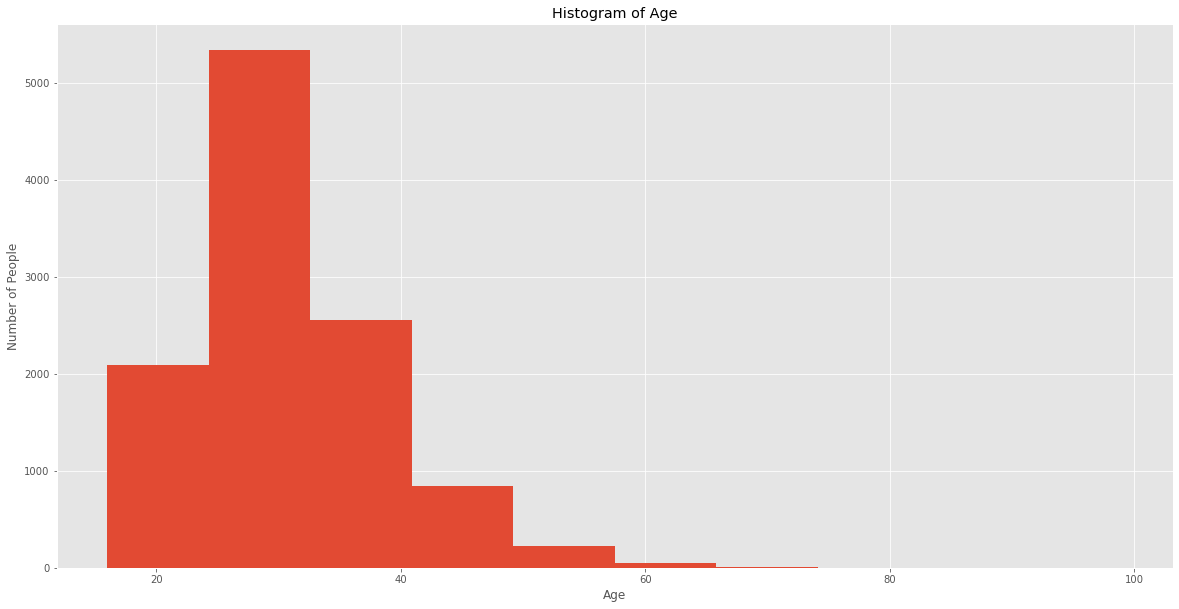

In [10]:
# your code goes here

df.Age.plot(kind='hist', stacked=False, figsize=(20, 10))

plt.title('Histogram of Age')
plt.ylabel('Number of People')
plt.xlabel('Age')

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


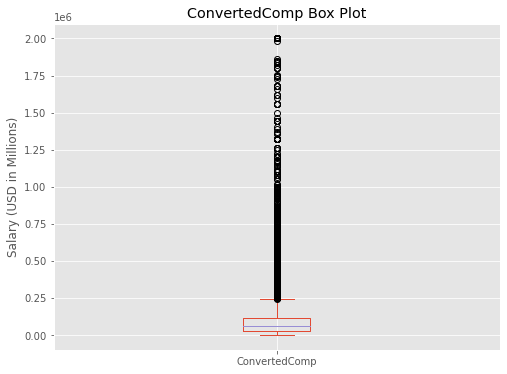

In [11]:
# your code goes here

df.ConvertedComp.plot(kind='box', figsize=(8, 6))

plt.title('ConvertedComp Box Plot')
plt.ylabel('Salary (USD in Millions)')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
# your code goes here

#First quartile.
Q1 = np.quantile(df.ConvertedComp, 0.25)

#Third quartile.
Q3 = np.quantile(df.ConvertedComp, 0.75)

#IQR is difference between the two.
IQR = Q3 - Q1

print(IQR)

86448.0


Find out the upper and lower bounds.


In [13]:
# your code goes here

upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

print(upper_bound, lower_bound)

245136.0 -100656.0


Identify how many outliers are there in the `ConvertedComp` column.


In [14]:
# your code goes here

outliers = df.ConvertedComp[(df.ConvertedComp <= lower_bound) | (df.ConvertedComp >= upper_bound)]

print(len(outliers))

811


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


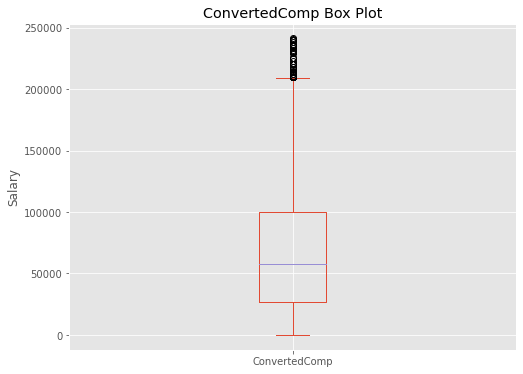

In [15]:
# your code goes here

df_no_outliers = df.ConvertedComp[(df.ConvertedComp >= lower_bound) & (df.ConvertedComp <= upper_bound)]

df_no_outliers.plot(kind='box', figsize=(8, 6))

plt.title('ConvertedComp Box Plot')
plt.ylabel('Salary')

plt.show()

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [169]:
# your code goes here

df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,GroupedConvertedComp
Respondent,1.000000,-0.013490,0.002101,-0.015314,0.004621,0.004041,0.001637
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970,0.010377
ConvertedComp,0.002101,0.001037,1.000000,0.020694,-0.031220,0.101676,0.931738
WorkWeekHrs,-0.015314,0.003510,0.020694,1.000000,0.026517,0.036518,0.022995
CodeRevHrs,0.004621,0.007063,-0.031220,0.026517,1.000000,-0.020469,-0.019542
Age,0.004041,0.006970,0.101676,0.036518,-0.020469,1.000000,0.104026
GroupedConvertedComp,0.001637,0.010377,0.931738,0.022995,-0.019542,0.104026,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
